## Bag of Words - Count Vectorizer

###### The bag-of-words model is a way of representing text data when modeling text with machine learning algorithms.
**Bag-of-words model is a commonly used document representation method in the field of information retrieval .**

>In information retrieval, the BOW model assumes that for a document, it ignores its word order, grammar, syntax and other factors, and treats it as a collection of several words. The appearance of each word in the document is independent and independent of whether other words appear. **(It's out of order)**

>It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.
>The Bag-of-words model (BoW model) ignores the grammar and word order of a text, and uses a set of unordered words to express a text or a document.


#### Let's take an example

John likes to watch movies. Mary likes too.

John also likes to watch football games.

In [1]:
words = ['John','likes','to','watch','movies','Mary','too','also','football','games']

Build a dictionary based on the words that appear in the above two sentences:

`{"John": 1, "likes": 2, "to": 3, "watch": 4, "movies": 5, "also": 6, "football": 7, "games": 8, "Mary": 9, "too": 10}`


The dictionary contains 10 words, each word has a unique index. Note that their order is not related to the order in which they appear in the sentence. According to this dictionary, we re-express the above two sentences into the following two vectors:

###### John likes to watch movies. Mary likes too. --->> [1, 2, 1, 1, 1, 0, 0, 0, 1, 1]

###### John also likes to watch football games.  --->> [1, 1, 1, 1, 0, 1, 1, 1, 0, 0]


These two vectors contain a total of 10 elements, where the i-th element represents the number of times the i-th word in the dictionary appears in the sentence. 

Now imagine a **huge document set D with a total of M documents**. After all the words in the document are extracted, they form a dictionary containing N words. Using the Bag-of-words model, **each document can be represented as an N-dimensional vector**.


Therefore, the BoW model can be considered as a statistical histogram. It is used in text retrieval and processing applications.

#### NLP - Sentiment Analysis

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Disable Warnings
import warnings
warnings.filterwarnings('ignore')

# NLP functionalities and libraries
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Classification evaluation
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score)

# Word Cloud
from wordcloud import WordCloud, STOPWORDS

In [3]:
# Importing the dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [4]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


###### Cleaning part

In [5]:
# Cleaning the texts
from nltk.stem import wordnet
nltk.download('wordnet')
lemma = wordnet.WordNetLemmatizer()
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])    #Remove Punctuations
    review = review.lower()                                    #lower case coversion
    review = review.split()                                    #split the words basis of space 
    ps = PorterStemmer()
    review = [lemma.lemmatize(word, pos ='v') for word in review if not word in set(stopwords.words('english'))] #lemmatization of word and check for stopword
    review = ' '.join(review)           # Agin join the word
    corpus.append(review)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
corpus[:5]

['wow love place',
 'crust good',
 'tasty texture nasty',
 'stop late may bank holiday rick steve recommendation love',
 'selection menu great price']

###### Bag of Words Model

In [7]:
# Creating the Bag of Words model with Count Vectors
cv = CountVectorizer(max_features = 500)

In [8]:
#vocab = cv.vocabulary_
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [9]:
vocab_cv = cv.vocabulary_

In [10]:
len(vocab_cv)

500

In [11]:
X.shape

(1000, 500)

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [13]:
# Logistic Reegression
from sklearn.linear_model import LogisticRegression
lr_cv = LogisticRegression()
lr_cv.fit(X_train, y_train)

LogisticRegression()

In [14]:
cv_coeffs = lr_cv.coef_
cv_coeffs.shape

(1, 500)

In [15]:
# Predicting the Test set results
y_pred = lr_cv.predict(X_test)

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75        97
           1       0.79      0.66      0.72       103

    accuracy                           0.73       200
   macro avg       0.74      0.74      0.73       200
weighted avg       0.74      0.73      0.73       200



In [17]:
cm

array([[79, 18],
       [35, 68]], dtype=int64)

In [18]:
ac

0.735

### TF-IDF - Term Frequency and Inverse Document Frequency

**TF-IDF (Term Frequency-Inverse Document Frequency)**, a commonly used weighting technique for information retrieval and information exploration.

TF-IDF is a statistical method used to evaluate the importance of a word to a file set or a file in a corpus. The importance of the word increases in proportion to the number of times it appears in the file, but at the same time decreases inversely with the frequency of its appearance in the corpus.

* **Term frequency TF (item frequency)**: number of times a given word appears in the text. This number is usually normalized (the numerator is generally smaller than the denominator) to prevent it from favoring long documents, because whether the term is important or not, it is likely to appear more often in long documents than in paragraph documents.

> **TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).**

Term frequency (TF) indicates how often a term (keyword) appears in the text .

This number is usually normalized (usually the word frequency divided by the total number of words in the article) to prevent it from favoring long documents.

**Formula of Tf**    ![title](tf.png)


where  ni, j  is the number of occurrences of the word in the file  dj  , and the denominator is the sum of the occurrences of all words in the file dj;

* **Inverse document frequency (IDF)**: A measure of the general importance of a word. The main idea is that if there are fewer documents containing the entry t and the larger, it means that the entry has a good ability to distinguish categories. The IDF of a specific word can be calculated by dividing the total number of files by the number of files containing the word, and then taking the log of the obtained quotient.

>**IDF(t) = log_e(Total number of documents / Number of documents with term t in it).**

**Formula of Idf**  ![title](idf1.png)


among them

* | D |: Total number of files in the corpus

* |  {  $j: $t_{i}$ \in $d_{j} $$  }  | : The number of files containing words $t_{i}$ ( $n_{i,j}$ $\neq$ 0 , the number of files). If the word is not in the corpus, it will cause the dividend to be zero, so it is generally used.1 + |  {  $j :$t_{i}$ \in $d_{j}$$  }  |.


**So, Formula of tf-Idf** ![title](ttttt.png)

#### Example:

Consider a document containing 100 words where in the word cat appears 3 times. 

The **term frequency (Tf) for cat** is then **(3 / 100) = 0.03**. Now, assume we have 10 million documents and the word cat appears in one thousand of these.

Then, the **inverse document frequency (Idf)** is calculated as **log(10,000,000 / 1,000) = 4.** 

Thus, the **Tf-idf** weight is the product of these quantities: **0.03 * 4 = 0.12.**

#### TF-IDF application

1.  **Search engine**
2.  **Keyword extraction**
3.  **Text similarity**
4.  **Text summary**

In [19]:
# Creating the Bag of Words model Tf-Idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 500)
X = tfidf.fit_transform(corpus).toarray()
vocab_tf = tfidf.vocabulary_
y = dataset.iloc[:, 1].values

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [21]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr_tf = LogisticRegression()
lr_tf.fit(X_train, y_train)

LogisticRegression()

In [22]:
tf_coeffs = lr_tf.coef_

In [23]:
# Predicting the Test set results
y_pred2 = lr_tf.predict(X_test)

In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
cm2 = confusion_matrix(y_test, y_pred2)
ac2 = accuracy_score(y_test, y_pred2)
roc2 = roc_auc_score(y_test, y_pred2)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        97
           1       0.82      0.65      0.72       103

    accuracy                           0.74       200
   macro avg       0.76      0.75      0.74       200
weighted avg       0.76      0.74      0.74       200



In [25]:
cm2

array([[82, 15],
       [36, 67]], dtype=int64)

In [26]:
ac2

0.745

### n GRAM (Unigram, Bigram, Trigram)

In computational linguistics, n-gram refers to n consecutive items in the text (items can be phoneme, syllable, letter, word or base pairs)

N-grams of texts are widely used in the field of text mining and natural language processing. They are basically a set of co-occurring words within a defined window and when computing the n-grams, we typically move one word forward or more depending upon the scenario.

In [41]:
s = """Natural-language processing (NLP) is an area of computer science and artificial intelligence concerned with the interactions between computers and human (natural) languages."""

In [44]:
import re

def generate_ngrams(s, n):
    # Convert to lowercases
    s = s.lower()
    
    # Replace all none alphanumeric characters with spaces
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
    # Break sentence in the token, remove empty tokens
    token = [token for token in s.split() if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[token[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [45]:
generate_ngrams(s, n=3)

['natural language processing',
 'language processing nlp',
 'processing nlp is',
 'nlp is an',
 'is an area',
 'an area of',
 'area of computer',
 'of computer science',
 'computer science and',
 'science and artificial',
 'and artificial intelligence',
 'artificial intelligence concerned',
 'intelligence concerned with',
 'concerned with the',
 'with the interactions',
 'the interactions between',
 'interactions between computers',
 'between computers and',
 'computers and human',
 'and human natural',
 'human natural languages']

### Co-occurrence matrix

The co-occurrence matrix is ​​also expressed by considering the relationship between words in the corpus.

The big idea — Similar words tend to occur together and will have a similar context for example — Apple is a fruit. Mango is a fruit.

Apple and mango tend to have a similar context i.e fruit.

Co-occurrence — For a given corpus, the co-occurrence of a pair of words say w1 and w2 is the number of times they have appeared together in a Context Window.

Context Window — Context window is specified by a number and the direction.


A very important idea is that we think that the meaning of a word is closely related to the word next to it. This is where we can set a window (the size is generally 5 ~ 10). The size of the window below is 2, so in this window, the words that appear with rests are life, he, in, and peace. Then we use this co-occurrence relationship to generate word vectors.

![title](concurrence.jpg)

#### How to form the Co-occurrence matrix:

The matrix A stores co-occurrences of words.
In this method, we count the number of times each word appears inside a window of a particular size around the word of interest.
Calculate this count for all the words in the corpus.
Let us understand all of this with the help of an example.
Let our corpus contain the following three sentences:


###### I enjoy flying
###### I like NLP
###### I like deep learning


Let window size =1. This means that context words for each and every word are 1 word to the left and one to the right. Context words for:

I = enjoy(1 time), like(2 times)

enjoy = I (1 time), flying(1 time)

flying = enjoy(1 time)

like = I(2 times), NLP(1 time), deep(1 time)

NLP = like(1 time)

deep = like(1 time), learning(1 time)

learning = deep(1 time)

Therefore, the resultant co-occurrence matrix A with fixed window size 1 looks like :

![title](Cooccurance_matrix_table.png)

###### Problem — 

For a huge corpus, this co-occurrence matrix could become really complex (high-dimension).

###### Solution — 

Singular value decomposition(SVD) and principal component analysis(PCA) are two eigenvalue methods used to reduce a high-dimensional dataset into fewer dimensions while retaining important information.

# Word Embeddings

> **Embedding mathematically represents a mapping , f: X-> Y, which is a function**. 


Where the function is

•	**injective** (which is what we call an **injective function** , each Y has a unique X correspondence, and vice versa)

•	**structure-preserving** ( structure preservation , for example, X1 < X2 in the space to which X belongs, then the same applies to Y1 <Y2 in the space to which Y belongs after mapping).

> So for word embedding, the word word is mapped to another space, where this mapping has the characteristics of injective and structure-preserving.

Popular translation can be considered as word embedding, **which is to map the words in the space to which X belongs to a multi-dimensional vector in Y space , then the multi-dimensional vector is equivalent to embedding in the space to which Y belongs** , one carrot and one pit. 

1. Text data needs to be pre-processed into tensor form before it can be input to the neural network.
2. The process of dividing text into units is called tokenization, and the unit of division is called tokens.
3. Text can be divided into words, characters (abcdefg ...), n-gram and so on.
4. Generally use one-hot encoding or word-embedding to process words into numerical tensors.
5. One-hot encoding is simple, but without structure, the distance between any two words is √2.
6. The word-embedding space has small dimensions, structure in space, similar words are near, and unrelated words are far away.
7. The role of the embedding layer can actually be seen as a matrix that maps the points in the high-dimensional space to the low-dimensional space.

Word embedding is a form of word representation **that connects the human understanding of language to that of the machine**. Word embeddings are the distributed representations of text in an ample dimensional space. By looking at different researches in the area of deep learning, word embeddings are essential. **It is the approach of representing words and documents that may be considered as one of the crucial breakthroughs in the field of deep learning on challenging NLP problems.**

Word embeddings are a class of techniques **where the individual word, is represented as a real-valued vector in a vector space**. The main idea is to use a densely distributed representation for all the words.
Each word is represented by a real-value vector. Each word is mapped to a single vector, and the vector values are learned in a way that resembles a neural network, and hence the technique is often lumped into the field of deep learning.

This is contrasted to the thousands of dimensions required for sparse word representations, such as **One-Hot Encoding**. **They are essential for solving most NLP problems**.

**The neural network cannot train the original text data. We need to process the text data into numerical tensors first. This process is also called text vectorization.**

There are several strategies for text vectorization:
1. Split text into words, each word is converted into a vector
2. Split text into characters, each character is converted into a vector
3. Extract n-gram of words or characters n-gram to a vector

**The unit into which text is decomposed is called token, and the process of decomposing text into token is called tokenization.**

To put it simply, we need to input text data into a neural network and let it train. However, neural networks cannot directly process text data. We need to pre-process text data into a format that the neural network can understand, which is the following process:

**Text ----> Participle ----> Vectorization**


There are two main methods for word vectorization:
1. One-hot encoding
2. Word embedding

### **One-Hot encoding**

**Why is it called one-hot?** 

**After each word is one-hot encoded, only one position has an element of 1 and the other positions are all 0.**

For example, 
the sentence **"the boy is crying"** (assuming there are only four English words in the world), after one-hot encoding,

**the corresponds to (1, 0, 0, 0)**

**boy corresponds to (0, 1, 0 ， 0）**

**is corresponds to (0,0,1,0)**

**crying corresponds to (0,0,0,1)**

Each word corresponds to a position in the vector, and this position represents the word.

But this way requires a very high dimension, because if all vocabularies have 100,000 words, then each word needs to be represented by a vector of length 100,000.

**the corresponding to (1, 0, 0, 0, ..., 0) (length is 100,000)**

**boy corresponding to (0, 1, 0, 0, ..., 0)**

**is corresponding to (0, 0, 1, 0 , ..., 0)**

**crying corresponds to (0,0,0,1, ..., 0) to get high-dimensional sparse tensors.**


![img_credit_tensorflow.org](one.jpg)


### Disadvatages of One HotEncoding

One-Hot coding is simple and easy to use, the disadvantages are also obvious:

>The length of the word vector is equal to the length of the vocabulary, and the word vector is extremely sparse. When the vocabulary is large, the computational complexity will be very large.

>Any two words are orthogonal, meaning that the relationship between words cannot be obtained from the One-Hot code

>The distance between any two words is equal, and the semantic relevance of the two words cannot be reflected from the distance


### ** Word Embedding**
In contrast, word embedding embeds words into a low-dimensional dense space.

Word Embedding is a representation of text where words that have the same meaning have a similar representation. In other words it represents words in a coordinate system where related words, based on a corpus of relationships, are placed closer together. In the deep learning frameworks such as TensorFlow, Keras, this part is usually handled by an embedding layer which stores a lookup table to map the words represented by numeric indexes to their dense vector representations.

For example, the same **"the boy is crying"** sentence (assuming that there are only 4 English words in the world), after encoding, it may become:

**the corresponding (0.1)**

**boy corresponding (0.14)**

**is corresponding (0)**

**crying corresponding (0.82)**

We assume that the embedded space is 256 dimensions (generally 256, 512 or 1024 dimensions, the larger the vocabulary, the higher the corresponding spatial dimension)

**Then
the corresponding (
0.1,
0.2, 0.4,
0 , ...) (vector length is 256) boy corresponds to (0.23, 0.14, 0, 0 , ...) is corresponding to (0, 0 , 0.41, 0.9, ...) , 0.82, 0, 0.14, ...)**

One-hot encoding is very simple, but the spatial dimension is high and for one-hot encoding, the distance between any two words is $$\sqrt{2}$$.

 But in practice, the word **(boy) to word (man) should be very close** (because they are closely related), and **the word (cat) to word (stone) should be very far** (because they are basically unrelated).

Embedding space has low dimensions and allows space to have structure .

For example, the distance between the vectors can reflect gender, age, etc. (this requires training, and the unembedding layer has no structure), for example:

**man-woman = boy-girl**

**man-daddy = woman-mother**}

### Word Embedding Algorithms

### 1. Word2Vec

Two different learning models were introduced that can be used as part of the word2vec approach to learn the word embedding; they are:

Continuous Bag-of-Words, or CBOW model.
Continuous Skip-Gram Model.
The CBOW model learns the embedding by predicting the current word based on its context. The continuous skip-gram model learns by predicting the surrounding words given a current word.

The continuous skip-gram model learns by predicting the surrounding words given a current word.

![title](Word2Vec-Training-Models.webp)

### 2. Glove

The basic idea behind the GloVe word embedding is to derive the relationship between the words from Global Statistics

**GloVe is an unsupervised learning algorithm for obtaining vocabulary vector representations. The aggregated global word co-occurrence statistics from the corpus are trained and the resulting representations show interesting linear substructures of the word vector space.**


Official website homepage address: <a href="https://nlp.stanford.edu/projects/glove/" target="_blank">https://nlp.stanford.edu/projects/glove/</a>

Github: <a href="https://github.com/stanfordnlp/GloVe" target="_blank">https://github.com/stanfordnlp/GloVe</a>

Paper download address: <a href="https://nlp.stanford.edu/pubs/glove.pdf" target="_blank">https://nlp.stanford.edu/pubs/glove.pdf</a>

### 3. Embedding Layer





### 4. Pretrained word embeddings

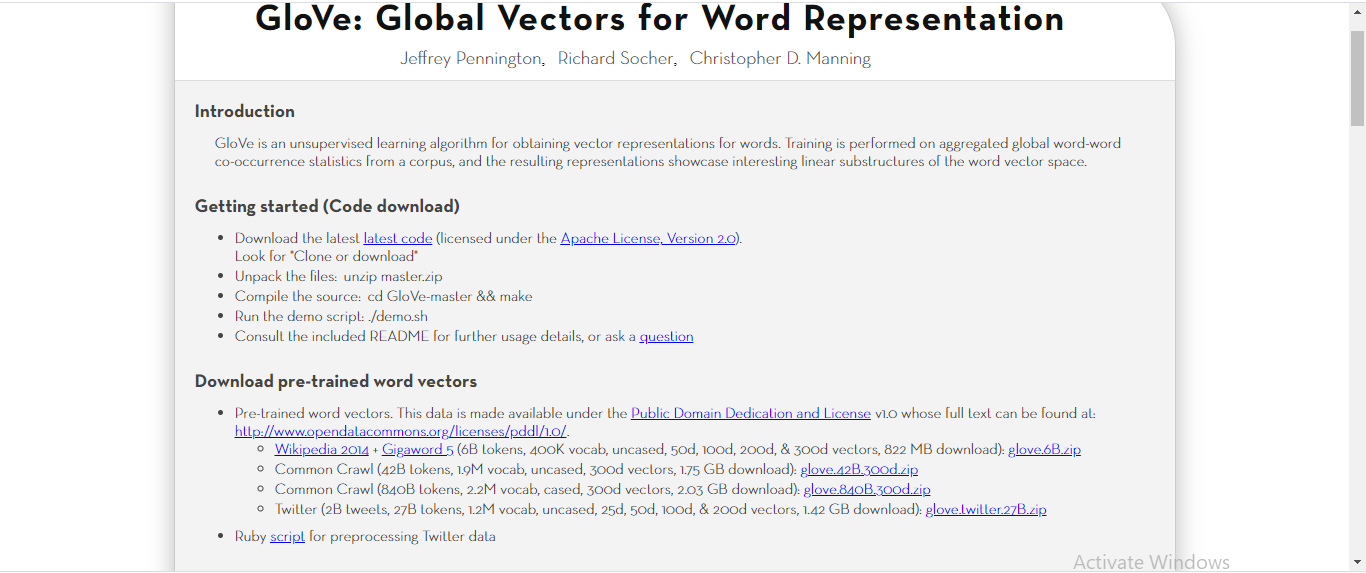

### Document Classification and Embeddings

##### Word Embedding is a representation of text where words that have the same meaning have a similar representation. In other words it represents words in a coordinate system where related words, based on a corpus of relationships, are placed closer together. In the deep learning frameworks such as TensorFlow, Keras, this part is usually handled by an embedding layer which stores a lookup table to map the words represented by numeric indexes to their dense vector representations.

In [46]:
import gensim
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
# Others
import re
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

from sklearn.manifold import TSNE

from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from bs4 import BeautifulSoup as soup
from nltk.stem.snowball import SnowballStemmer

In [47]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, load_model, Model
from keras.layers import Flatten, Dropout, Activation, Input, Dense, concatenate
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

ModuleNotFoundError: No module named 'keras'

In [ ]:
df = pd.read_csv('bbc-text.csv')
df.head()

In [ ]:
df['category'].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])

In [ ]:
df.head()

In [ ]:
le.classes_

In [ ]:
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    ## Stemming
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text

In [ ]:
# apply the above function to df['text']
df['text'] = df['text'].map(lambda x: clean_text(x))

In [ ]:
df.head()

In [ ]:
df['text'][0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'].values, dummy_y, test_size = 0.25, random_state = 101)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocabulary_size = len(tokenizer.word_index) + 1
vocabulary_size

In [ ]:
tokenizer.word_index

In [ ]:
trainsequences = tokenizer.texts_to_sequences(X_train)
print(trainsequences)

In [ ]:
X_train.shape

In [ ]:
len(trainsequences)

In [ ]:
trainsequences[0]

In [ ]:
MAXLEN = 250

In [ ]:
trainseqs = pad_sequences(trainsequences, maxlen=MAXLEN, padding='post')
print(trainseqs)

In [ ]:
trainseqs.shape

In [ ]:
testsequences = tokenizer.texts_to_sequences(X_test)
testseqs = pad_sequences(testsequences, maxlen=MAXLEN, padding='post')

In [ ]:
rainseqs.shape

In [ ]:
y_test.shape

In [ ]:
embedding_size = 32

In [ ]:
op_units = df['category'].nunique()

In [ ]:
# define the model
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=MAXLEN))
model.add(Flatten())
model.add(Dense(op_units, activation='softmax'))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# summarize the model
print(model.summary())

In [ ]:
# fit the model
model.fit(trainseqs, 
          y_train, 
          epochs=5,
          validation_data=(testseqs,y_test),
          verbose=2)

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(testseqs, y_test, verbose=2)
print('Loss: %f' % (loss))
print('Accuracy: %f' % (accuracy*100))

In [ ]:
model.layers[0].get_weights()[0].shape

In [ ]:
# Extract weights from the Embedding Layers
embeddings = model.layers[0].get_weights()[0]

# `embeddings` has a shape of (num_vocab, embedding_dim) 

# `word_to_index` is a mapping (i.e. dict) from words to 
# their index
words_embeddings = {w:embeddings[idx] for w, idx in tokenizer.word_index.items()}

In [ ]:
words_embeddings['tiger']

### Pre-trained Embeddings

In [ ]:
### Gensim Word2Vec Embeddings

In [ ]:
news_corpus = df['text'].values.tolist()

In [ ]:
len(df['text'])

In [ ]:
news_corpus = []
for i in range(len(df['text'])):
    news = df['text'][i].lower()
    news = news.split()
    news_corpus.append(news)

In [ ]:
len(news_corpus)

In [ ]:
news_corpus[0]

In [ ]:
# Word2Vec Data processing
from gensim.models import Word2Vec
model_w2v = Word2Vec(sentences=news_corpus, size=embedding_size, 
                window=5, workers=4, min_count=50)

In [ ]:
model_w2v.wv.most_similar('futur')

In [ ]:
words = list(model_w2v.wv.vocab)
print("Vocabulary size: %d"% len(words))

In [ ]:
filename = 'news_w2v.txt'
model_w2v.wv.save_word2vec_format(filename, binary=False)

### Use pre-trained w2v as Embeddings

In [ ]:
import os

embeddings_index_w2v = {}
f = open(os.path.join('','news_w2v.txt'), encoding='utf-8')

for line in f:
    values = line.split()
    word = values[0]
    coeffs = np.asarray(values[1:])
    embeddings_index_w2v[word] = coeffs
f.close()

In [ ]:
embeddings_index_w2v['said']

In [ ]:
# Vectorize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_corpus)
seqs = tokenizer.texts_to_sequences(news_corpus)

In [ ]:
# Pad sequences
word_index = tokenizer.word_index
print("Found %d unique tokens"% len(word_index))

news_pad = pad_sequences(seqs, maxlen = 50)
news_pad.shape

In [ ]:
num_words = len(word_index) + 1
embedding_matrix_w2v = np.zeros((num_words, embedding_size))

for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector = embeddings_index_w2v.get(word)
    if embedding_vector is not None:
        # words not found in embeddings_index_w2v will be all zeros
        embedding_matrix_w2v[i] = embedding_vector
print(num_words)    

In [ ]:
# define the model
model_pt_w2v = Sequential()
embedding_layer_pt_w2v = Embedding(num_words, 
                            embedding_size,
                            embeddings_initializer = Constant(embedding_matrix_w2v),
                            input_length=MAXLEN,
                            trainable=False)
model_pt_w2v.add(embedding_layer_pt_w2v)
model_pt_w2v.add(Flatten())
model_pt_w2v.add(Dense(op_units, activation='softmax'))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(model.summary())

In [ ]:
# fit the model
model.fit(trainseqs, 
          y_train, 
          batch_size=128, 
          epochs=50, 
          validation_data=(testseqs, y_test), 
          verbose=2)